In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Function to read the .s2p file and parse the data
def read_s2p_file(filename):
    data = []
    
    with open(filename, 'r') as file:
        for line in file:
            # Skip comment lines that start with '#' or '!'
            if line.startswith('#') or line.startswith('!'):
                continue
            # Split the numeric data into columns
            columns = line.strip().split()
            if len(columns) == 9:  # Ensure correct number of columns
                freq = float(columns[0])
                s11_db = float(columns[1])
                s11_ang = float(columns[2])
                s21_db = float(columns[3])
                s21_ang = float(columns[4])
                s12_db = float(columns[5])
                s12_ang = float(columns[6])
                s22_db = float(columns[7])
                s22_ang = float(columns[8])
                
                # Append the data to the list
                data.append([freq, s11_db, s11_ang, s21_db, s21_ang, s12_db, s12_ang, s22_db, s22_ang])
    
    # Convert to a pandas DataFrame with proper column names
    df = pd.DataFrame(data, columns=[
        'Frequency (Hz)', 'S11 (dB)', 'S11 (Angle)', 'S21 (dB)', 'S21 (Angle)',
        'S12 (dB)', 'S12 (Angle)', 'S22 (dB)', 'S22 (Angle)'
    ])
    
    return df

# Usage
filename = 'PREAMP_HG_FS_GAIN0_CALIB_CH23_CITI0.s2p'
df = read_s2p_file(filename)

# Print the first few rows of the DataFrame
print(df.head(10))


   Frequency (Hz)   S11 (dB)  S11 (Angle)   S21 (dB)  S21 (Angle)   S12 (dB)  \
0   300000.000000 -15.629313     8.940392 -12.521827    86.780020 -49.103802   
1   328532.647521 -15.326837    16.255891 -12.254079    86.858652 -47.345684   
2   357065.295042 -13.683967    10.731768 -11.266278    85.708453 -41.214245   
3   385597.942563 -15.939926     1.348894 -10.303765    82.999244 -39.076026   
4   414130.590084 -12.850053     4.929841  -9.917033    85.436518 -38.960275   
5   442663.237605 -14.629960   -23.641532  -9.206089    84.711596 -49.534440   
6   471195.885126 -16.266872   -16.903512  -8.941652    84.048805 -45.961065   
7   499728.532648 -15.349665   -21.626778  -8.555820    83.093605 -39.008571   
8   528261.180169 -15.835666    11.766224  -8.169285    82.397637 -43.162900   
9   556793.827690 -15.664752   -19.287330  -7.423373    81.088274 -38.882510   

   S12 (Angle)   S22 (dB)  S22 (Angle)  
0   -80.270995 -29.306456     4.038736  
1    -9.309926 -28.477306     1.83381

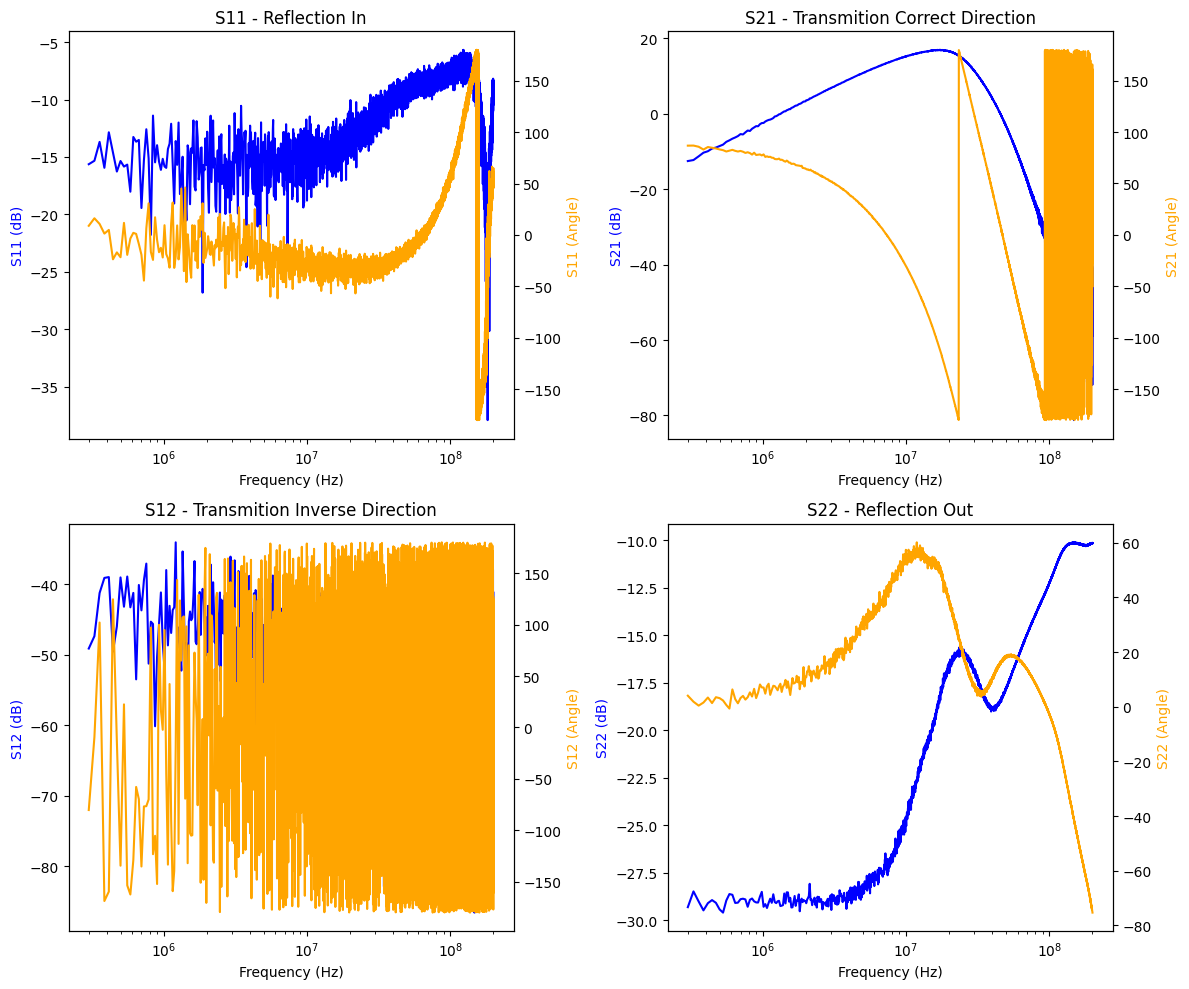

In [22]:
# Function to plot the S-parameter data with dual y-axes
def plot_s_parameters_dual_axis(df):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    
    # Plot S11 (Top left)
    ax1 = axs[0, 0]
    ax2 = ax1.twinx()
    ax1.plot(df['Frequency (Hz)'], df['S11 (dB)'], label='S11 (dB)', color='blue')
    ax2.plot(df['Frequency (Hz)'], df['S11 (Angle)'], label='S11 (Angle)', color='orange')
    ax1.set_title('S11 - Reflection In')
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('S11 (dB)', color='blue')
    ax2.set_ylabel('S11 (Angle)', color='orange')
    ax1.set_xscale('log')  # Set x-axis to logarithmic scale
    
    # Plot S21 (Top right)
    ax1 = axs[0, 1]
    ax2 = ax1.twinx()
    ax1.plot(df['Frequency (Hz)'], df['S21 (dB)'], label='S21 (dB)', color='blue')
    ax2.plot(df['Frequency (Hz)'], df['S21 (Angle)'], label='S21 (Angle)', color='orange')
    ax1.set_title('S21 - Transmition Correct Direction')
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('S21 (dB)', color='blue')
    ax2.set_ylabel('S21 (Angle)', color='orange')
    ax1.set_xscale('log')  # Set x-axis to logarithmic scale
    
    # Plot S12 (Bottom left)
    ax1 = axs[1, 0]
    ax2 = ax1.twinx()
    ax1.plot(df['Frequency (Hz)'], df['S12 (dB)'], label='S12 (dB)', color='blue')
    ax2.plot(df['Frequency (Hz)'], df['S12 (Angle)'], label='S12 (Angle)', color='orange')
    ax1.set_title('S12 - Transmition Inverse Direction')
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('S12 (dB)', color='blue')
    ax2.set_ylabel('S12 (Angle)', color='orange')
    ax1.set_xscale('log')  # Set x-axis to logarithmic scale
    
    # Plot S22 (Bottom right)
    ax1 = axs[1, 1]
    ax2 = ax1.twinx()
    ax1.plot(df['Frequency (Hz)'], df['S22 (dB)'], label='S22 (dB)', color='blue')
    ax2.plot(df['Frequency (Hz)'], df['S22 (Angle)'], label='S22 (Angle)', color='orange')
    ax1.set_title('S22 - Reflection Out')
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('S22 (dB)', color='blue')
    ax2.set_ylabel('S22 (Angle)', color='orange')
    ax1.set_xscale('log')  # Set x-axis to logarithmic scale
    
    # Adjust layout for better readability
    plt.tight_layout()
    plt.show()

# Plot the S-parameters
plot_s_parameters_dual_axis(df)